# **Práctica recuperación Román Merino**

# 1. Una sección llamada __Preliminares__ donde se realiza la descripción del problema y objetivos, así como explicar cómo implementarán su solución. Debe considerar qué criterios de optimización y métricas de desempeño.


el problema es saber si una persona es capaz de donar. Para ello debemos saber si gana más de 50. Se realizará un análisis exploratorio, un preprocesamiento para eliminar filas y ver si se cuenta con las filas necesarias, se observarán las principales variables usadas para saber la distribución de los datos, y finalizaré con un análisis test, su función y como optimizar el modelo de la mejor manera posible.

# 2. Una sección llamada __Aspectos computacionales__ donde se describirán las librerías y módulos a implementar, así como las funciones generadas y su objetivo.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import fbeta_score, accuracy_score, roc_auc_score, make_scorer

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Práctica de recuperación/income-db.csv")
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


# 3. Una sección llamada __Descripción__ donde se generará un análisis descriptivo considerando el tipo de variables (desde el punto de vista estadístico así como computacional). Esta sección debe considerar estadísticos descriptivos univariantes, multivariantes, datos perdidos, outliers y gráficos de distribución sobre las variables a analizar.  A partir de ésta se debe clarificar la estrategia de preprocesamiento (imputación de datos o eliminación de filas, eliminación de outliers y, recodificaciones).

## Análisis exploratorio

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
df["income"].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [7]:
# Proporción
df["income"].value_counts()/len(df['income'])

<=50K    0.760718
>50K     0.239282
Name: income, dtype: float64

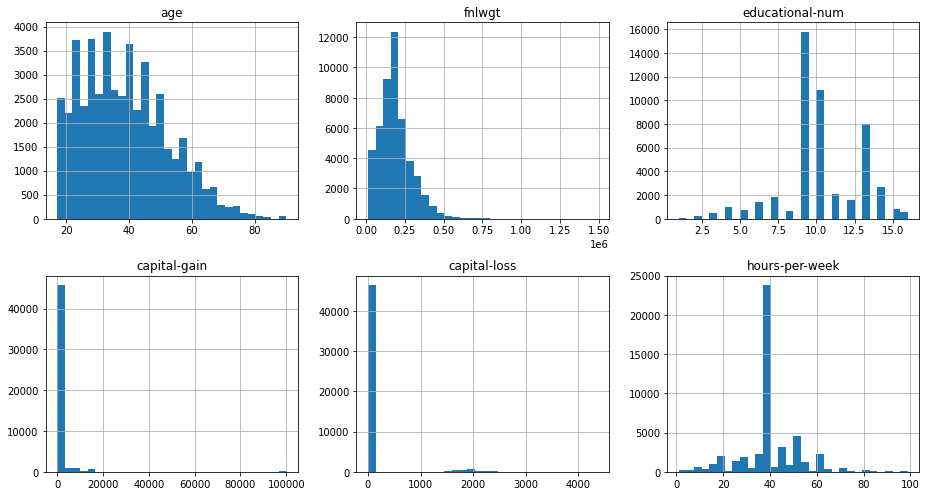

In [8]:
df.hist(figsize=(13,7),bins=30,layout=(2,3))
plt.tight_layout()
plt.show()

## Preprocesamiento

In [12]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [10]:
df['income'] = df.income.replace({'<=50K':0, '>50K':1})

In [11]:
df.head(2)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0


In [13]:
df=df.replace('?', np.nan)

In [14]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [15]:
df.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [16]:
# se eliminan, la cantidad de filas
len(df)- len(df.dropna(axis=0))
# se cuenta con suficientes datos

3620

In [17]:
df=df.dropna(axis=0)

# 4. Una sección llamada __Modelo descriptivo__ de modelado descriptivo, recordamos que la reducción dimensional o clustering son buenas herramientas para análisis descriptivo. Se buscará definir cuáles son las principales variables de objeto de estudio. En base a esta sección se podrá construir o depurar el modelo predictivo (selección de variables, incluir resultados de clustering, trabajar con las componentes principales en lugar de las originales, ingeniería de variables,...)

## Lista de variables numéricas

In [18]:
income_y = df['income']
variable_ind = df.drop('income', axis=1)
var_numerica = list(variable_ind.describe().columns)
print(var_numerica)

['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']


### Ahora miramos como se distribuye los datos (las numerica)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 25 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


age skew: 0.5328158942555791


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 25 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


fnlwgt skew: 1.447515552609532


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 25 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


educational-num skew: -0.3106209464770188


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 25 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


capital-gain skew: 11.789002180291192


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 25 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


capital-loss skew: 4.516304152981587


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 25 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


hours-per-week skew: 0.34054514378520867


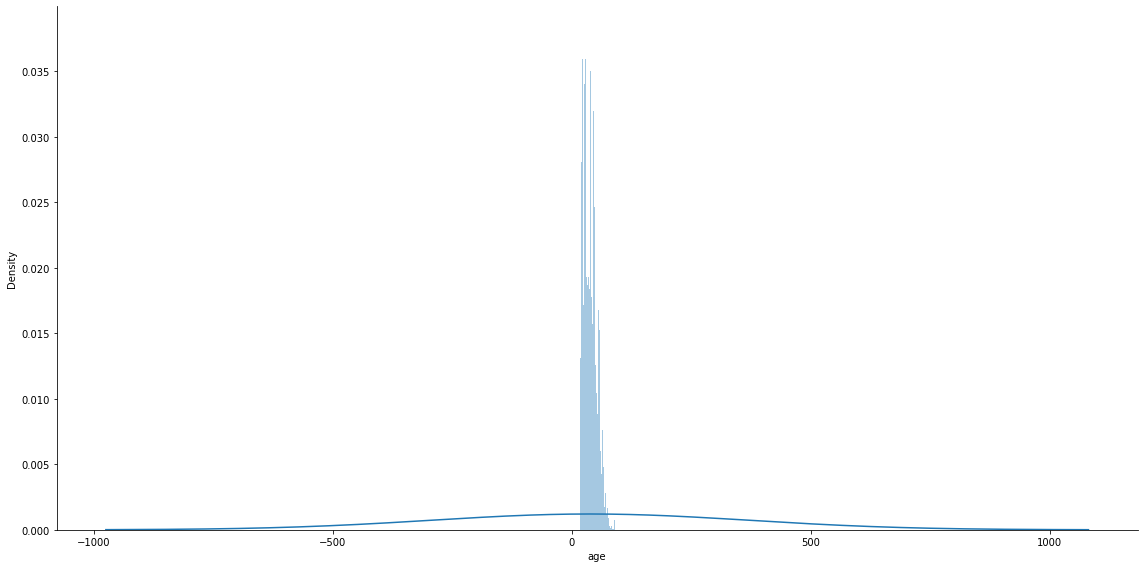

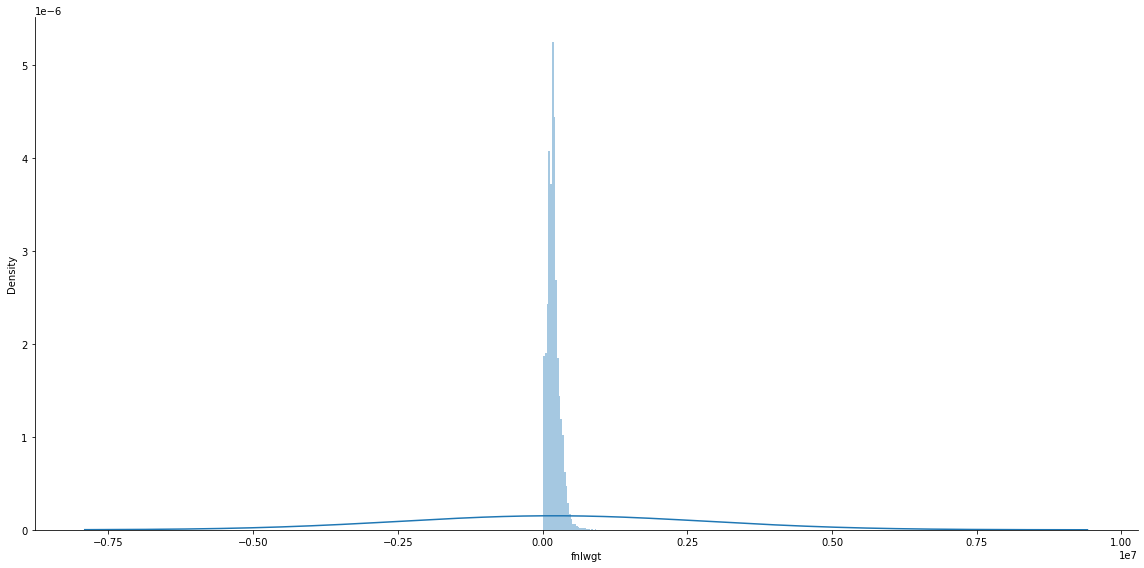

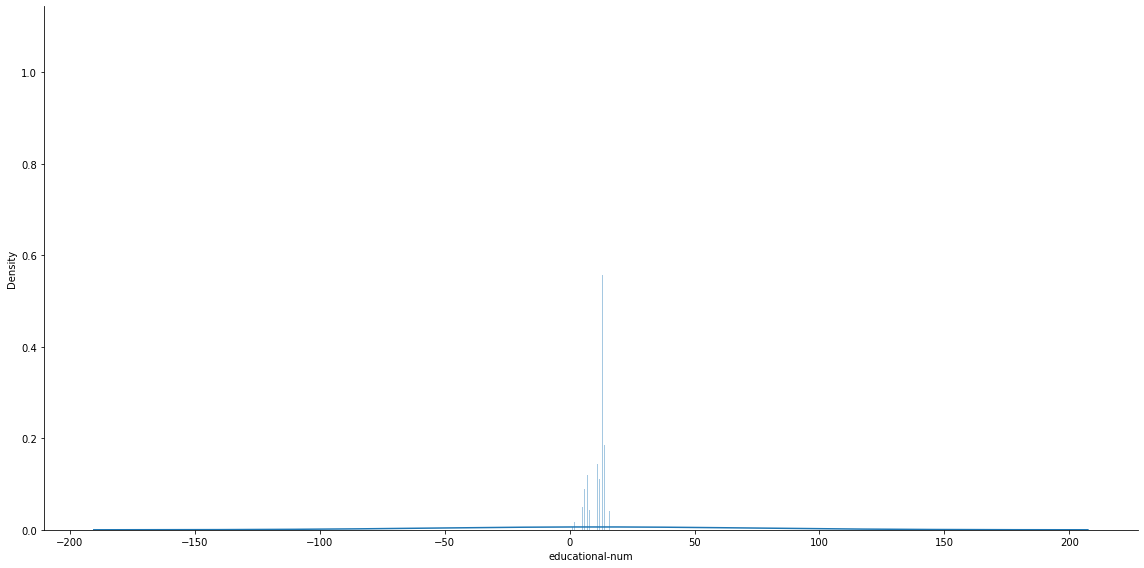

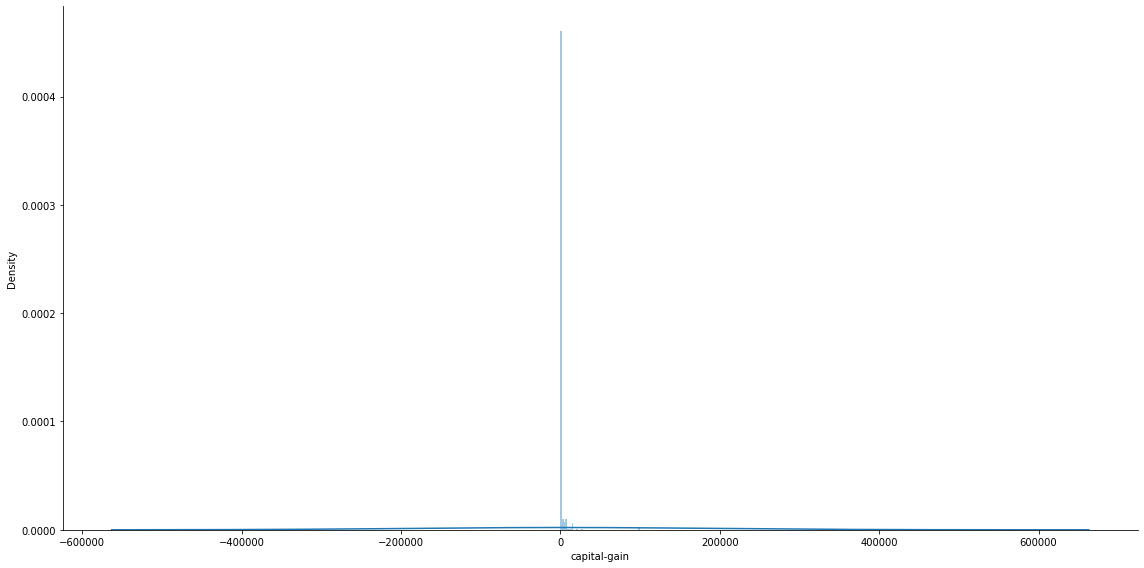

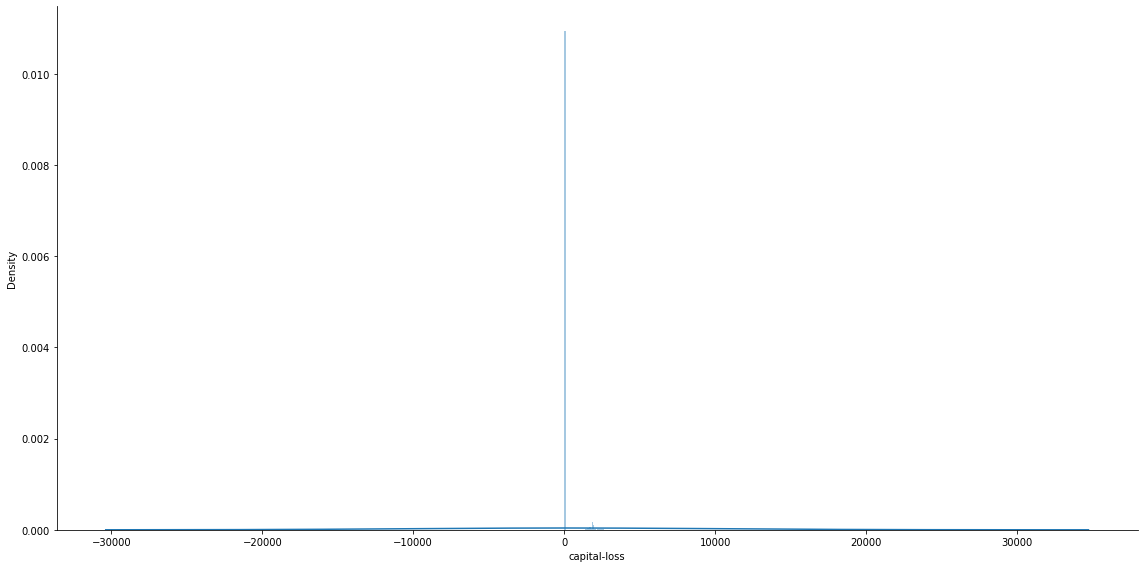

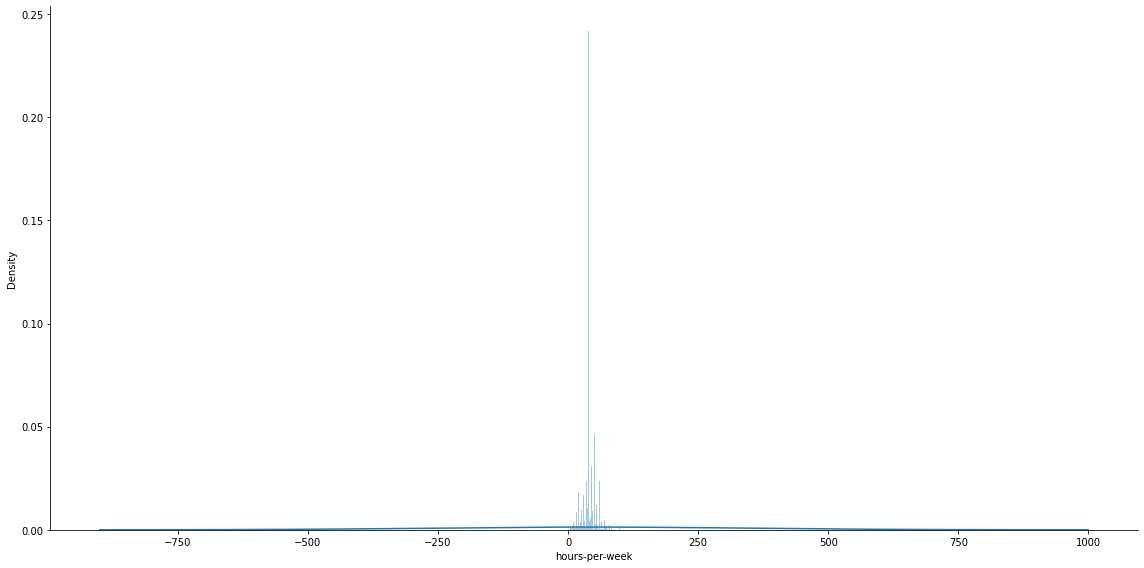

In [19]:
for col in var_numerica:
    a = sns.FacetGrid(variable_ind, height=8, aspect=2)
    a.map(sns.distplot, col, kde_kws={'bw': 25})
    a.add_legend
    print('{} skew: {}'.format(col, variable_ind[col].skew()))

In [20]:
sesgo = ['capital-gain', 'capital-loss']
variable_log_transformed = pd.DataFrame(data = variable_ind)
variable_log_transformed[sesgo] = variable_ind[sesgo].apply(lambda x: np.log(x + 1))

scaler = MinMaxScaler()
variable_log_minmax_transform = pd.DataFrame(data = variable_log_transformed)
variable_log_minmax_transform[var_numerica] = scaler.fit_transform(variable_log_transformed[var_numerica])

variable_final = pd.get_dummies(variable_log_minmax_transform)

In [21]:
variable_final.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0.109589,0.144430,0.400000,0.000000,0.0,0.397959,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,0.287671,0.051677,0.533333,0.000000,0.0,0.500000,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,0.150685,0.219011,0.733333,0.000000,0.0,0.397959,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.369863,0.099418,0.600000,0.777174,0.0,0.397959,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
5,0.232877,0.125398,0.333333,0.000000,0.0,0.295918,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


# 5. Una sección llamada __Modelación predictiva__ de modelado predictivo, donde se implementará una solución analítica que optimice las métricas de validación elegidas (curva ROC, matriz de confusión; si se ha elegido resolver un problema de clasificación. Error cuadrático medio, MAE, si se ha elegido un problema de regresión. Usando siempre train y test o cross-validation). Se solicitan por lo menos 3 modelos predictivos, donde deberán reportar las principales métricas. Cada modelo predictivo debe tener un pequeño párrafo sobre el por qué se diseñó de esa forma.

## Datos de entrenamiento y test

In [22]:
# Importar train_test_split
# Dividir los datos de "características" e "ingresos" en conjuntos de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(variable_final, 
                                                    income_y, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Mostrar los resultados de la división
print("El conjunto de entrenamiento tiene {} muestras.".format(X_train.shape[0]))
print("El conjunto de pruebas tiene {} muestras.".format(X_test.shape[0]))

El conjunto de entrenamiento tiene 36177 muestras.
El conjunto de pruebas tiene 9045 muestras.


### Función

In [23]:
def entrenar_modelo(modelo, X_train, y_train, X_test, y_test): 
    resultado = {}
    modelo = modelo.fit(X_train, y_train) 
        
    predictions_test = modelo.predict(X_test)
    predictions_train = modelo.predict(X_train)
               
    # Calcula la precisión de las primeras 300 muestras de entrenamiento, que es y_train[:300]
    resultado['acc_train'] = accuracy_score(y_train, predictions_train)
        
    # Calcular la precisión en el conjunto de pruebas mediante accuracy_score()
    resultado['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # Calcula roc_auc_score en las primeras 300 muestras de entrenamiento que es y_train[:300]
    resultado['roc_auc_score_train'] = roc_auc_score(y_train[:300], modelo.predict_proba(X_train[:300])[:, 1])
    
    # Calcular roc_auc_score en el conjunto de prueba que es y_test
    resultado['roc_auc_score_test'] = roc_auc_score(y_test, modelo.predict_proba(X_test)[:, 1])
    
    print('{} entrenado en {} muestras'.format(modelo.__class__.__name__, len(X_train)))
    print('\n'+'-'*10)
    # Devuelve el resultado
    return resultado

In [24]:
# aplicar algoritmo
algoritmo_rf = RandomForestClassifier()
algoritmo_multi = MultinomialNB()
algoritmo_aboost = AdaBoostClassifier()

resultado = {}
for clf in [algoritmo_rf, algoritmo_multi, algoritmo_aboost]:
    clf_name = clf.__class__.__name__
    resultado[clf_name] = entrenar_modelo(clf, X_train, y_train, X_test, y_test)

RandomForestClassifier entrenado en 36177 muestras

----------
MultinomialNB entrenado en 36177 muestras

----------
AdaBoostClassifier entrenado en 36177 muestras

----------


In [25]:
metricas = pd.DataFrame(data=resultado).transpose().reset_index()
metricas = metricas.rename(columns={'index': 'models'})
metricas

,models,acc_train,acc_test,roc_auc_score_train,roc_auc_score_test
0,RandomForestClassifier,0.999889,0.845550,1.000000,0.896645
1,MultinomialNB,0.796307,0.788502,0.881755,0.872851
2,AdaBoostClassifier,0.861818,0.846877,0.916353,0.904625


### Optimizando el mejor modelo

In [26]:
algoritmo_aboost = AdaBoostClassifier()
parameters = {'n_estimators':[20, 50, 100], 'learning_rate':[0.01, 0.5, 1]}
scorer = make_scorer(roc_auc_score)
grid_obj = GridSearchCV(algoritmo_aboost, parameters, scoring=scorer, n_jobs=-1)
grid_fit = grid_obj.fit(X_train, y_train)
mejor_modelo = grid_fit.best_estimator_
predictions = (algoritmo_aboost.fit(X_train, y_train)).predict(X_test)
mejor_predict = mejor_modelo.predict(X_test)

In [27]:
print("\n Modelo optimizado\n------")
print("Puntuación final de precisión en los datos de las pruebas: {:.4f}".format(accuracy_score(y_test, mejor_predict)))
print("Roc_au_score en datos de prueba: {:.4f}".format(roc_auc_score(y_test, mejor_modelo.predict_proba(X_test)[:,1])))


 Modelo optimizado
------
Puntuación final de precisión en los datos de las pruebas: 0.8512
Roc_au_score en datos de prueba: 0.9102
